# Data Inspection

In [1]:
# Import libriaries
import pandas as pd
import numpy as np

In [2]:
# read sales data
df_sales = pd.read_excel('ausapparalsales4thqrt2020.xlsx', index_col=0, parse_dates=True)

In [3]:
df_sales.head()

Time State     Group  Unit  Sales
Date                                               
2020-10-01     Morning    WA      Kids     8  20000
2020-10-01     Morning    WA       Men     8  20000
2020-10-01     Morning    WA     Women     4  10000
2020-10-01     Morning    WA   Seniors    15  37500
2020-10-01   Afternoon    WA      Kids     3   7500

In [4]:
# Check information about columns
df_sales.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7560 entries, 2020-10-01 to 2020-12-30
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Time    7560 non-null   object
 1   State   7560 non-null   object
 2   Group   7560 non-null   object
 3   Unit    7560 non-null   int64 
 4   Sales   7560 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 354.4+ KB


In [5]:
# Check data type of each column
print(f"Data type of each columns is:\n{df_sales.dtypes}\n")

# Check the shape of the dataset
print(f"Dataset shape is: \n{df_sales.shape}\n")

# Check if a dataset contains nulls
print(f"Dataset contains following nulls: \n{df_sales.isna().sum()}\n")

# Check how many non-null values are present in the dataset
print(f"Non-null values in the dataset are: \n{df_sales.notna().sum()}")

Data type of each columns is:
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

Dataset shape is: 
(7560, 5)

Dataset contains following nulls: 
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

Non-null values in the dataset are: 
Time     7560
State    7560
Group    7560
Unit     7560
Sales    7560
dtype: int64


In [6]:
# to check unique values for the attributes
print(f"Unique values for a column 'Time' are: \n{df_sales['Time'].unique()}\n")

print(f"Unique values for a column 'State' are:\n{df_sales['State'].unique()}\n")

print(f"Uniqueq values for a column 'Group' are: \n{df_sales['Group'].unique()}\n")

Unique values for a column 'Time' are: 
[' Morning' ' Afternoon' ' Evening']

Unique values for a column 'State' are:
[' WA' ' NT' ' SA' ' VIC' ' QLD' ' NSW' ' TAS']

Uniqueq values for a column 'Group' are: 
[' Kids' ' Men' ' Women' ' Seniors']



In [7]:
# To check values per index
print(f"Values per index are: \n{df_sales.value_counts()}\n")

# to check if a dataset contains duplicates
group_by_columns = ['Date','Group','State','Time']
reset_df = df_sales.reset_index()
unique_attributes_df = reset_df.groupby(group_by_columns,as_index=False).size().sort_values(['size'], ascending=False)
print(f"Values per each attribute are: \n{unique_attributes_df}")

Values per index are: 
Time        State  Group     Unit  Sales 
 Evening     NT     Women    9     22500     16
 Afternoon   TAS    Kids     6     15000     16
             NT     Women    6     15000     16
 Morning     NT     Seniors  7     17500     15
 Evening     WA     Men      6     15000     15
                                             ..
             NSW    Women    38    95000      1
                             33    82500      1
                             31    77500      1
 Afternoon   TAS    Kids     2     5000       1
 Evening     VIC    Kids     42    105000     1
Name: count, Length: 1851, dtype: int64

Values per each attribute are: 
           Date   Group State        Time  size
0    2020-10-01    Kids   NSW   Afternoon     1
5035 2020-11-30   Women   VIC     Evening     1
5047 2020-12-01    Kids   QLD     Evening     1
5046 2020-12-01    Kids   QLD   Afternoon     1
5045 2020-12-01    Kids    NT     Morning     1
...         ...     ...   ...         ...   ..

## Inference from the data checking:
1. There are not nulls in the dataset. However, if nulls were present, the best ways is to drop nulls (df_sales.dropna()) as filling nulls can be misleading.
2. There are more than one row per index. However, there are no duplicates per index and each attribute.
3. Columns with string attribues have a format Object. Also, the columns have leading spaces.

# Data Wrangling

In [8]:
# convert Time, State and Group into a string
# put all object type columns into a list
cols = list(df_sales.select_dtypes(np.object_).columns)

# Remove spaces and convert to string
for column in cols:
    df_sales[column] = df_sales[column].apply(lambda x: x.strip()).astype('string')

In [9]:
df_sales.dtypes

Time     string[python]
State    string[python]
Group    string[python]
Unit              int64
Sales             int64
dtype: object

In [10]:
# to check unique values for the attributes after conversion
print(f"Unique values for a column 'Time' are: \n{df_sales['Time'].unique()}\n")

print(f"Unique values for a column 'State' are:\n{df_sales['State'].unique()}\n")

print(f"Uniqueq values for a column 'Group' are: \n{df_sales['Group'].unique()}\n")

Unique values for a column 'Time' are: 
<StringArray>
['Morning', 'Afternoon', 'Evening']
Length: 3, dtype: string

Unique values for a column 'State' are:
<StringArray>
['WA', 'NT', 'SA', 'VIC', 'QLD', 'NSW', 'TAS']
Length: 7, dtype: string

Uniqueq values for a column 'Group' are: 
<StringArray>
['Kids', 'Men', 'Women', 'Seniors']
Length: 4, dtype: string



## Data Normalization
To normalize the data, data distribution check should be performed

Price per item is:  2500.0


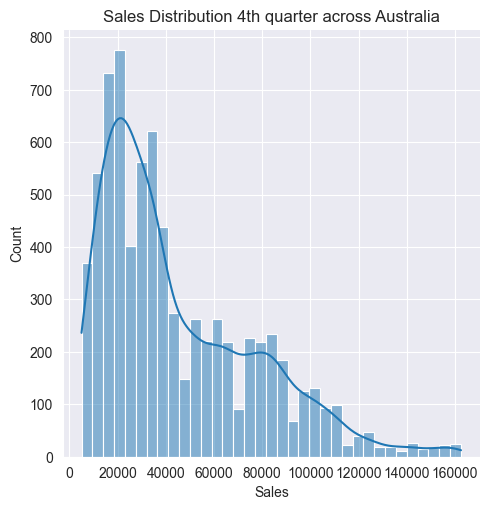

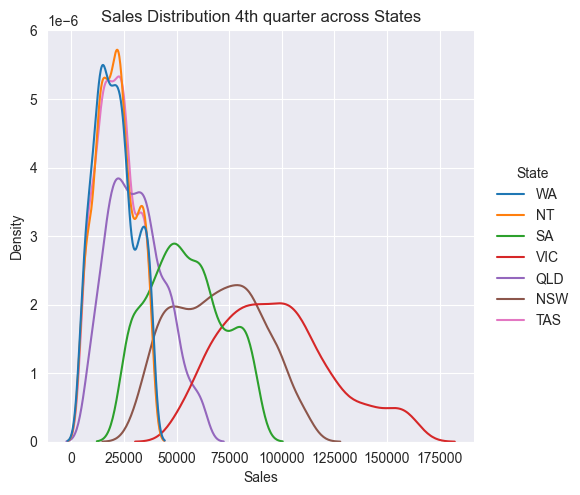

In [11]:
# to check sales price
price_mean = (df_sales['Sales']/df_sales['Unit']).mean()
print("Price per item is: ",price_mean)

# To check Sales distribution
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

# overall distribution
dist_overall = sns.displot(df_sales['Sales'], kde=True)
dist_overall.set(title="Sales Distribution 4th quarter across Australia")

# Sales distribution for each state
# for data distribution check distribution plot graph is used
dist_states = sns.displot(df_sales, x="Sales", hue="State",kind="kde")
dist_states.set(title="Sales Distribution 4th quarter across States")

In [12]:
from scipy.stats import skew 
# Calculate the skewness
print(skew(df_sales['Sales'], axis=0, bias=True))

1.0853347546987901


In [13]:
for state in df_sales['State'].unique():
    state_df = df_sales.loc[df_sales['State'] == state]

    # Calculate the skewness for each state
    print(state, skew(state_df['Sales'], axis=0, bias=True))

WA 0.2304415104878072
NT 0.11960256025225811
SA 0.15602209362489133
VIC 0.4947629426334414
QLD 0.3425359223365126
NSW 0.04347995366551109
TAS 0.11005976629286288


### Inference from data distribution
1. Price is the same across all states and categories.
2. Data is skewed to the right for sales data across all states.
3. Data for each state is also skewed, however skewness is not as sever as overall sales data.
4. As data is skewed, an approaches should be used - Log Transformation.

-0.25762825073657664


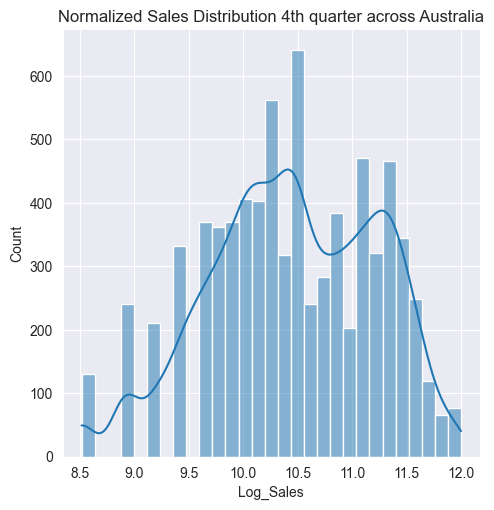

In [14]:
# Log data normalization method
df_sales['Log_Sales'] = df_sales['Sales'].apply(lambda x: np.log(x))

# check data skewness for the log method
print(skew(df_sales['Log_Sales'], axis=0, bias=True))

# overall distribution normalized
dist_overall_norm = sns.displot(df_sales['Log_Sales'],kde=True)
dist_overall_norm.set(title="Normalized Sales Distribution 4th quarter across Australia")

## Data Grouping recommendations for data chunking or merging
For data analysis it is recommended to group data by:
1. Date and state in order to check outperforming/underperforming states
2. Date and group in order to check outperforming/underperforming groups
3. Date and state/group/time to check how multiple attributes affect sales.

# Data Analysis
## Descriptive analysis

In [15]:
df_sales[['Sales','Unit']].describe()

Sales         Unit
count    7560.000000  7560.000000
mean    45013.558201    18.005423
std     32253.506944    12.901403
min      5000.000000     2.000000
25%     20000.000000     8.000000
50%     35000.000000    14.000000
75%     65000.000000    26.000000
max    162500.000000    65.000000

In [16]:
print(f"Median is: \n{df_sales[['Sales','Unit']].median()}\n")

Median is: 
Sales    35000.0
Unit        14.0
dtype: float64



In [17]:
# groupby State to get statistics for each state
print('State Unit Statistics: \n',df_sales.groupby('State').Unit.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')
print('State Sales Statistics: \n',df_sales.groupby('State').Sales.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')

print('Group Unit Statistics: \n',df_sales.groupby('Group').Unit.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')
print('Group Sales Statistics: \n',df_sales.groupby('Group').Sales.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')

print('Time of a day Unit Statistics: \n',df_sales.groupby('Time').Unit.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')
print('Time of a day Sales Statistics: \n',df_sales.groupby('Time').Sales.agg(['mean', 'median', 'min', 'max','sum']).sort_values('mean'),'\n')

State Unit Statistics: 
             mean  median  min  max    sum
State                                    
WA      8.204630     8.0    2   15   8861
NT      8.362963     8.0    2   15   9032
TAS     8.429630     8.0    2   15   9104
QLD    12.376852    12.0    3   25  13367
SA     21.799074    21.0   10   35  23543
NSW    27.766667    28.0   12   45  29988
VIC    39.098148    38.0   20   65  42226 

State Sales Statistics: 
                mean   median    min     max        sum
State                                                 
WA     20511.574074  20000.0   5000   37500   22152500
NT     20907.407407  20000.0   5000   37500   22580000
TAS    21074.074074  20000.0   5000   37500   22760000
QLD    30942.129630  30000.0   7500   62500   33417500
SA     54497.685185  52500.0  25000   87500   58857500
NSW    69416.666667  70000.0  30000  112500   74970000
VIC    97745.370370  95000.0  50000  162500  105565000 

Group Unit Statistics: 
               mean  median  min  max    sum
Gro

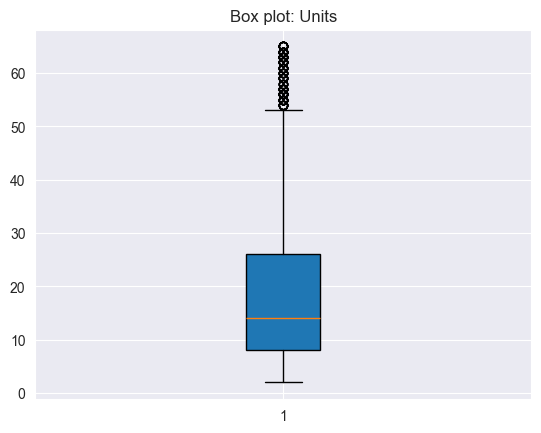

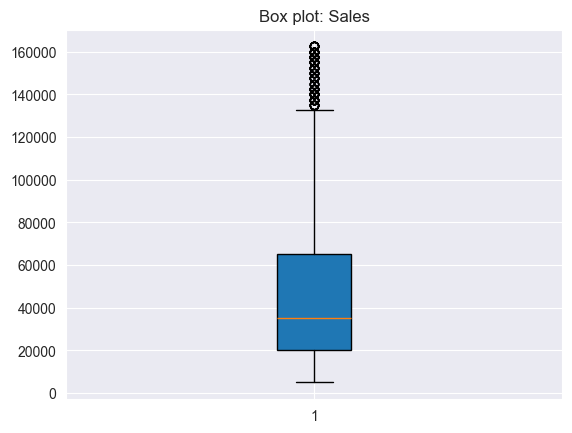

In [18]:
# Create a box plot to check outliers
plt.boxplot(df_sales['Unit'], patch_artist=True, notch=False)
plt.title('Box plot: Units')
# Show the plot
plt.show()

# Create a box plot
plt.boxplot(df_sales['Sales'], patch_artist=True, notch=False)
plt.title('Box plot: Sales')

# Show the plot
plt.show()

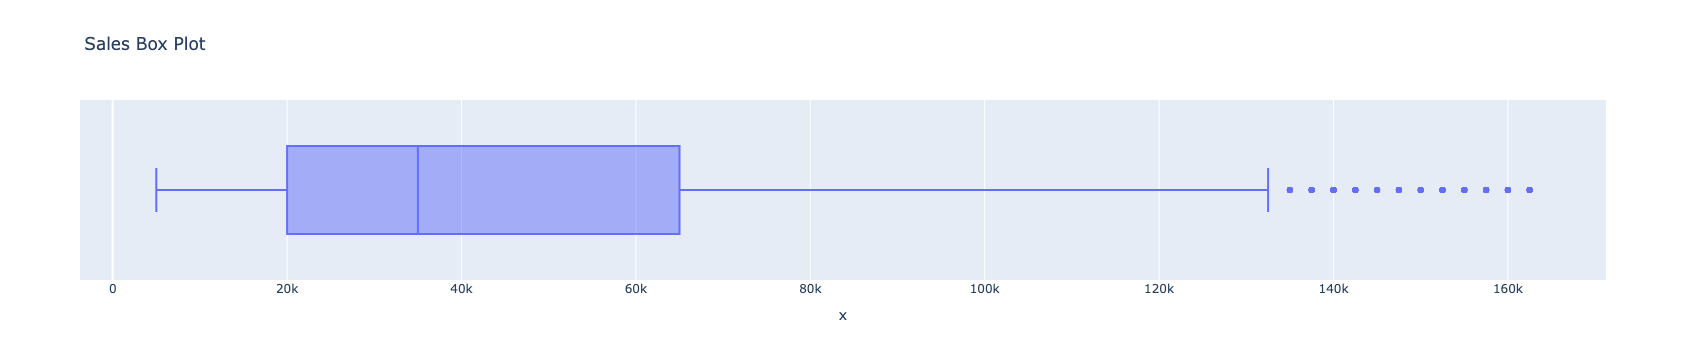

In [19]:
# to create a scatter plot graph by using plotly directly
import plotly.express as px
fig = px.box(df_sales['Sales'], x = df_sales['Sales'],title = 'Sales Box Plot')
fig.show()

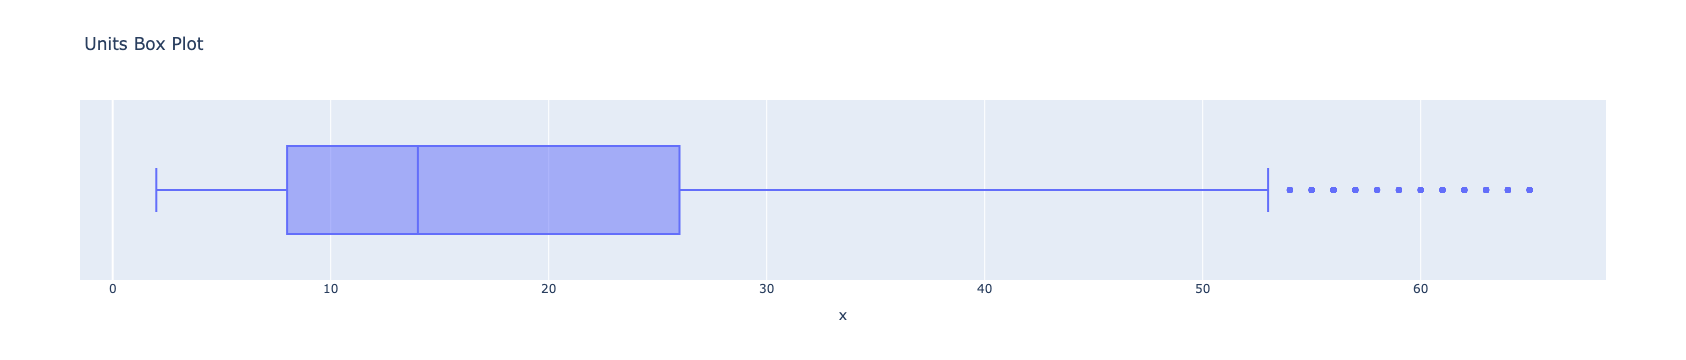

In [20]:
# to create a graph by using plotly directly
import plotly.express as px
#fig = px.box(df, x = df['price'],title = 'Box Plot using Plotly')
fig = px.box(df_sales['Unit'], x = df_sales['Unit'], title = 'Units Box Plot')
fig.show()

## Inference from describe function and additional stat functions
1. As data contains outliers, median is used to check data. In general, customers buy 14 units per quarter with at mimimum 2 items and maximum 65 units.
2. Multiple state perform differently. The state can be divided into 3 perfomance groups - low (WA,NT,TAS, QLD), medium (SA) and high (NSW, VIC).
3. All groups relevantly equally create sales. However, the top group is 'Men'. The bottom one is Senior.
4. In a morning, a company receives slightly more sales in comparison with afternoon and evening.

## Weekly Analysis

In [21]:
# data preparation for weekly/monthly/quarterly analysis
reindexed_data = df_sales.reset_index()
reindexed_data['Date'] = pd.to_datetime(reindexed_data['Date'])

In [22]:
reindexed_data.head()

Date       Time State    Group  Unit  Sales  Log_Sales
0 2020-10-01    Morning    WA     Kids     8  20000   9.903488
1 2020-10-01    Morning    WA      Men     8  20000   9.903488
2 2020-10-01    Morning    WA    Women     4  10000   9.210340
3 2020-10-01    Morning    WA  Seniors    15  37500  10.532096
4 2020-10-01  Afternoon    WA     Kids     3   7500   8.922658

In [23]:
# Group weekly details
group_subset = reindexed_data[['Date','Group','Sales', 'Unit']]
weekly_group = group_subset.groupby('Group').resample('W-Mon', on='Date')['Sales', 'Unit'].sum().reset_index()
weekly_group.head()

Group       Date    Sales  Unit
0  Kids 2020-10-05  4760000  1904
1  Kids 2020-10-12  6900000  2760
2  Kids 2020-10-19  6770000  2708
3  Kids 2020-10-26  6460000  2584
4  Kids 2020-11-02  5215000  2086

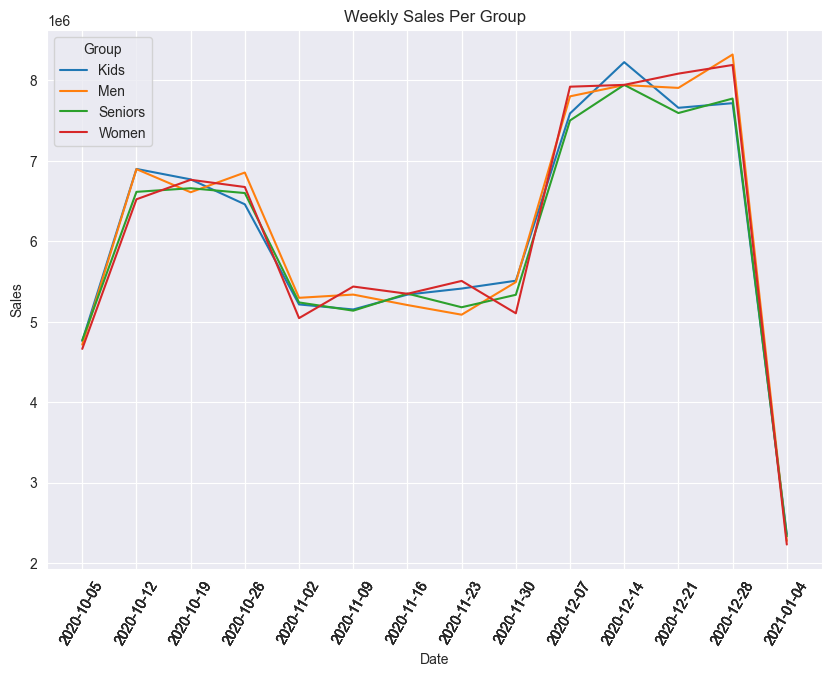

In [24]:
#  to check weekly sales, lineplot is used as it shows week over week analysis
plt.figure(dpi =100, figsize = (10,7))
g = sns.lineplot(data=weekly_group, x="Date", y="Sales", hue="Group")
g.set(title = "Weekly Sales Per Group")
g.tick_params(axis = 'x', rotation = 60)
g.set(xticks=weekly_group.Date.values)
plt.show()

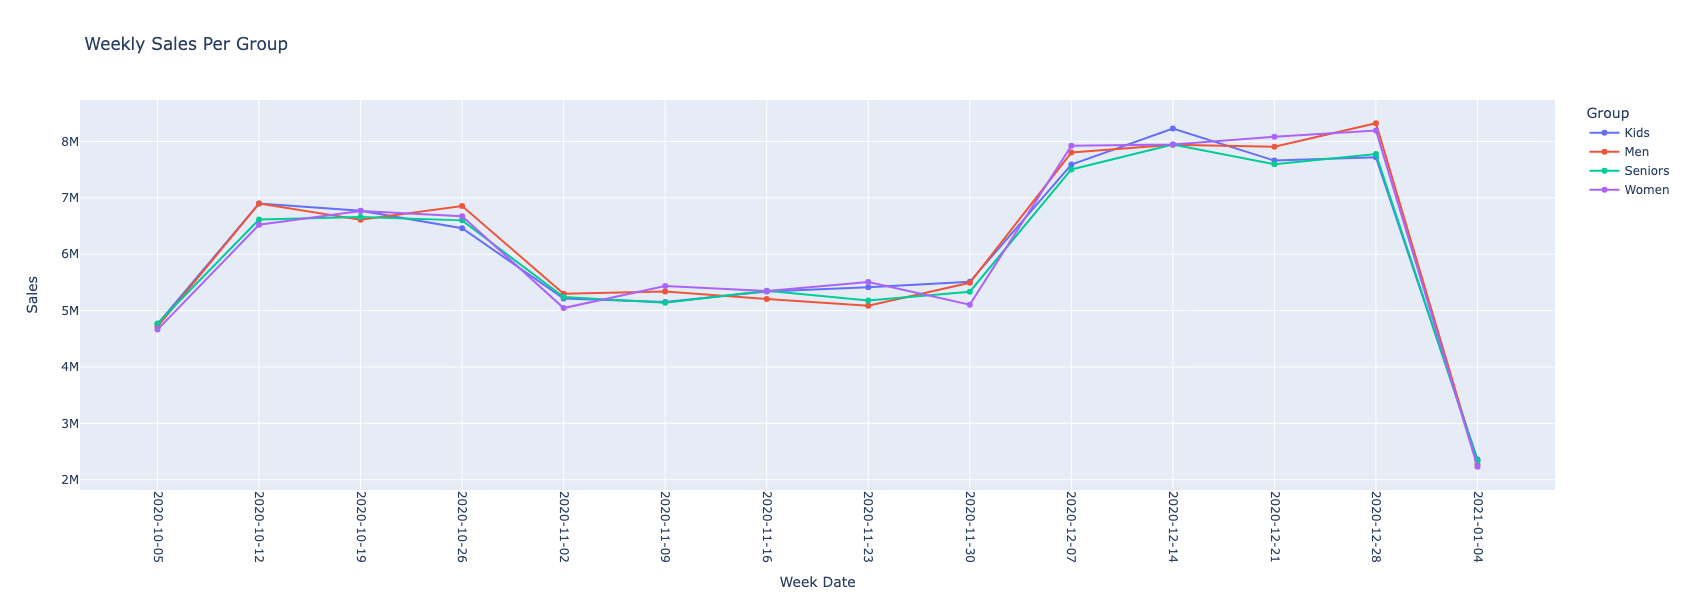

In [25]:
# Same line graph with plotly for interactive analysis
fig = px.line(weekly_group, 
              x= weekly_group['Date'].astype(str), 
              y="Sales", color='Group',
              title="Weekly Sales Per Group", 
              markers=True,
             width = 1200,
             height = 600,
             )

fig.update_xaxes(
    title = 'Week Date',
    type = 'category',
    tickangle = 90,
    tick0 = 0.2,
)
fig.show()

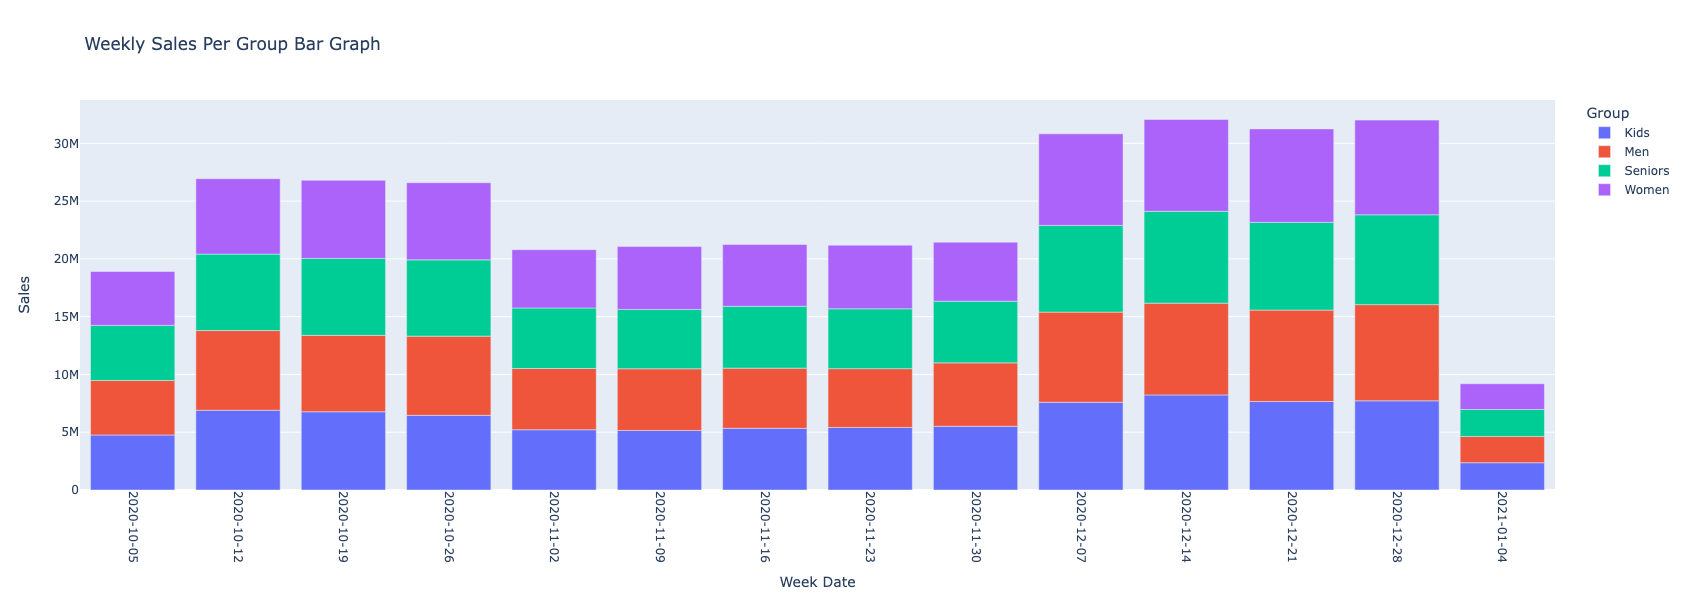

In [26]:
# Weekly data per group with bar graph for different visualition with plotly
fig = px.bar(weekly_group, 
              x= weekly_group['Date'].astype(str), 
              y="Sales", color='Group',
              title="Weekly Sales Per Group Bar Graph", 
             width = 1200,
             height = 600,
             )

fig.update_xaxes(#type ='category',
    title = 'Week Date',
    type = 'category',
    tickangle = 90,
    #tickformat="%Y-%m-%d",
    tick0 = 0.2,
)
fig.show()

In [27]:
# State weekly report
state_subset = reindexed_data[['Date','State','Sales', 'Unit']]
weekly_states = state_subset.groupby('State').resample('W-Mon', on='Date')['Sales', 'Unit'].sum().reset_index()
weekly_states.head()

State       Date    Sales  Unit
0   NSW 2020-10-05  4197500  1679
1   NSW 2020-10-12  5827500  2331
2   NSW 2020-10-19  5790000  2316
3   NSW 2020-10-26  5942500  2377
4   NSW 2020-11-02  4575000  1830

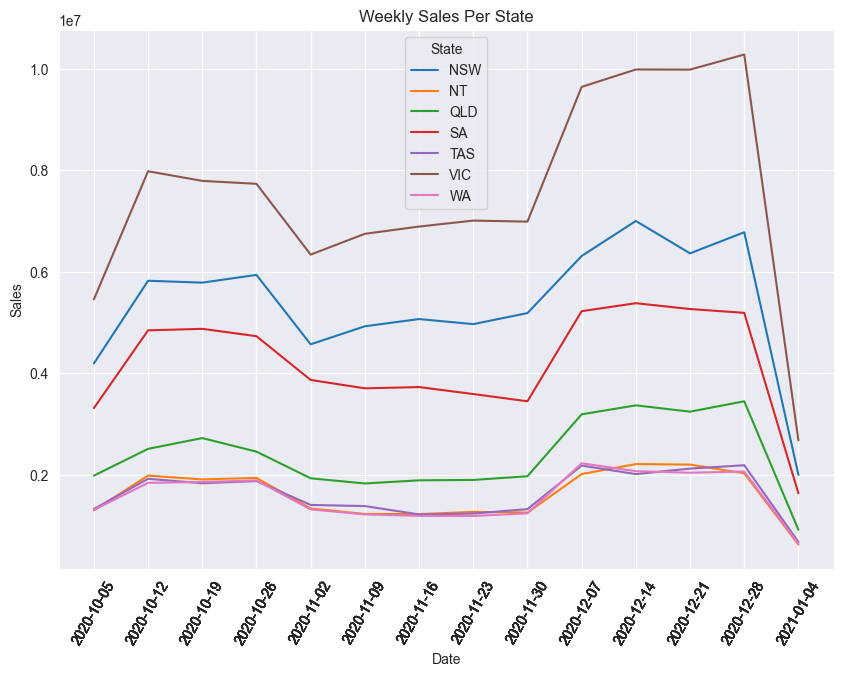

In [28]:
# Weekly Line plot for each state
plt.figure(dpi =100, figsize = (10,7))
g = sns.lineplot(data=weekly_states, x="Date", y="Sales", hue="State")
g.set(title = "Weekly Sales Per State")
g.tick_params(axis = 'x', rotation = 60)
g.set(xticks=weekly_states.Date.values)
plt.show()

In [29]:
# Time of a day weekly report
time_subset = reindexed_data[['Date','State','Sales', 'Time']]
weekly_time = time_subset.groupby(['Time']).resample('W-Mon', on='Date')['Sales'].sum().reset_index()
weekly_time.head()

Time       Date    Sales
0  Afternoon 2020-10-05  6052500
1  Afternoon 2020-10-12  8915000
2  Afternoon 2020-10-19  8972500
3  Afternoon 2020-10-26  8637500
4  Afternoon 2020-11-02  6855000

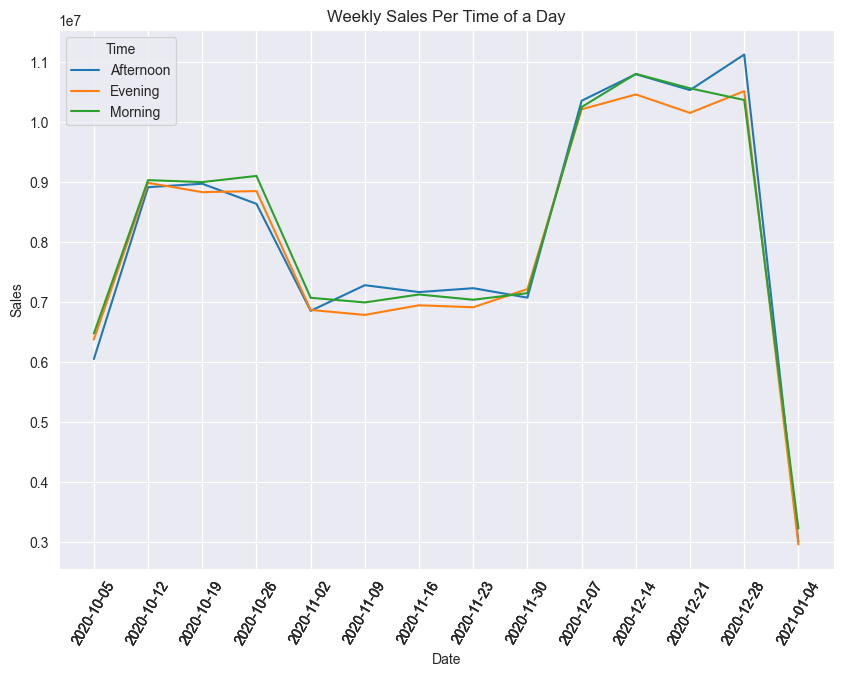

In [31]:
# Line Plot is used as it shows dinamic of each week
plt.figure(dpi =100, figsize = (10,7))
g = sns.lineplot(data=weekly_time, x="Date", y="Sales", hue="Time")
g.set(title = "Weekly Sales Per Time of a Day")
g.tick_params(axis = 'x', rotation = 60)
g.set(xticks=weekly_time.Date.values)
plt.show()

### Inference from the weekly reports:
1. All groups of items follow the similar pattern week over week.
2. Sales for all groups, exept Kids were stable in a period between weeks 2020-10-05 and 2020-10-26. After that, sales saw drastical decrease.
   Kids category sales started desending one week earlier.
3. Sales for all categories were the lowest between weeks 2020-11-09 and 020-11-30. After that all sales started exponentually growing with minor hiccups.
4. Sales per state showed similar tendency as per category. Sales decline around weeks 2020-11-09  to 2020-11-30.
5. Top state performer is VIC state. States NT, WA and TAS perform the least.
6. Week over week, customers changed their preferences on what time of a day to buy items.

# Monthly Analysis

In [32]:
# Group montly details
monthly_group = group_subset.groupby('Group').resample('M', on='Date')['Sales', 'Unit'].sum().reset_index()
monthly_group.head()

Group       Date     Sales   Unit
0  Kids 2020-10-31  28635000  11454
1  Kids 2020-11-30  22882500   9153
2  Kids 2020-12-31  33555000  13422
3   Men 2020-10-31  28885000  11554
4   Men 2020-11-30  22615000   9046

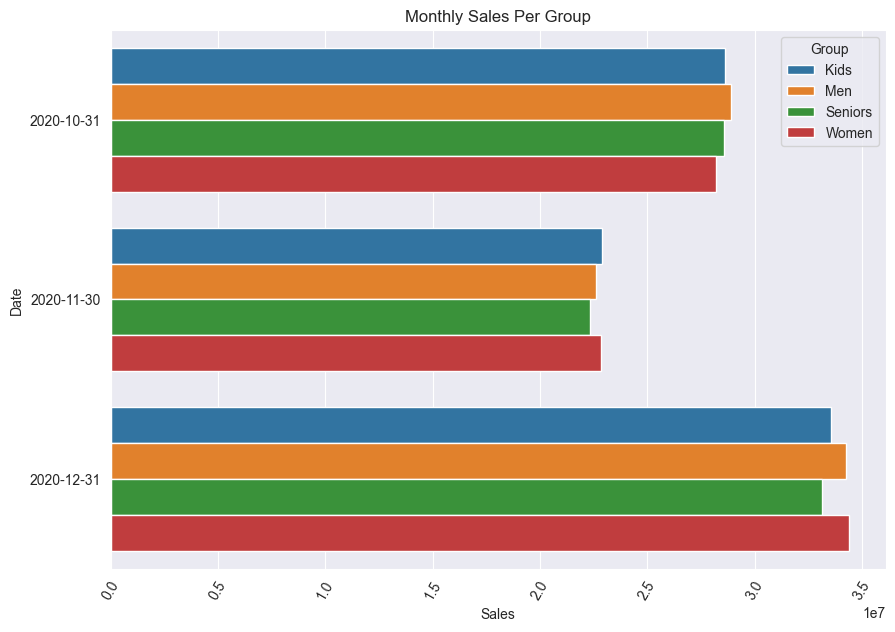

In [33]:
# As there are only 3 months, of data, bar grapth is used. 
# Line plot can be also used, but since there are not many data points a bar plot is preferable.
plt.figure(dpi =100, figsize = (10,7))
g = sns.barplot(data=monthly_group, x="Sales", y="Date", hue="Group")
g.set(title = "Monthly Sales Per Group")
g.tick_params(axis = 'x', rotation = 60)

In [34]:
# State monthly report
state_subset = reindexed_data[['Date','State','Sales', 'Unit']]
monthly_states = state_subset.groupby('State').resample('M', on='Date')['Sales', 'Unit'].sum().reset_index()
monthly_states.head()

State       Date     Sales   Unit
0   NSW 2020-10-31  25007500  10003
1   NSW 2020-11-30  21490000   8596
2   NSW 2020-12-31  28472500  11389
3    NT 2020-10-31   8222500   3289
4    NT 2020-11-30   5257500   2103

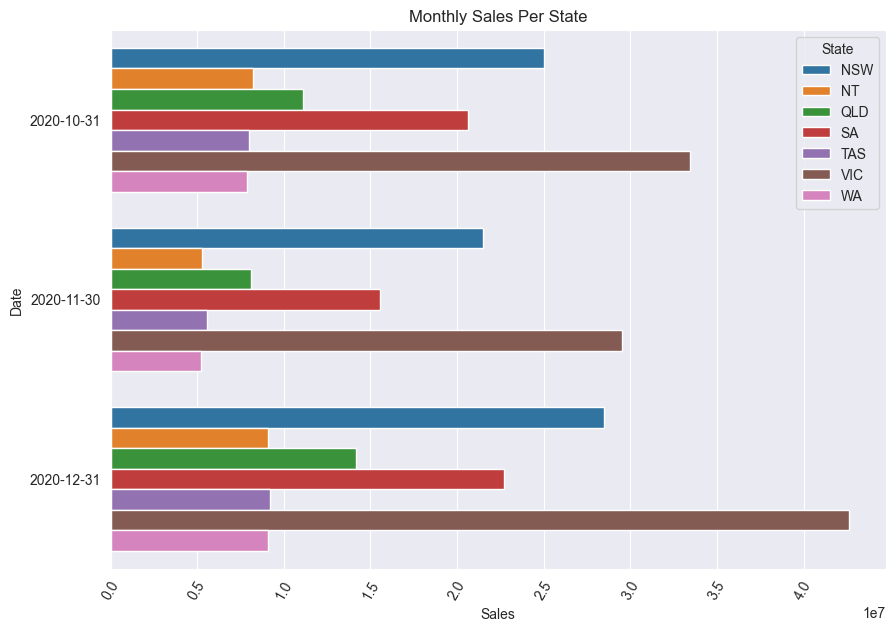

In [35]:
# As there are only 3 months, of data, bar grapth is used.
plt.figure(dpi =100, figsize = (10,7))
g = sns.barplot(data=monthly_states, x="Sales", y="Date", hue="State")
g.set(title = "Monthly Sales Per State")
g.tick_params(axis = 'x', rotation = 60)

In [36]:
# Time of a day monthly report
time_subset = reindexed_data[['Date','State','Sales', 'Time']]
monthly_time = time_subset.groupby(['Time']).resample('M', on='Date')['Sales'].sum().reset_index()
monthly_time.head()

Time       Date     Sales
0  Afternoon 2020-10-31  37432500
1  Afternoon 2020-11-30  30757500
2  Afternoon 2020-12-31  45817500
3    Evening 2020-10-31  38040000
4    Evening 2020-11-30  29745000

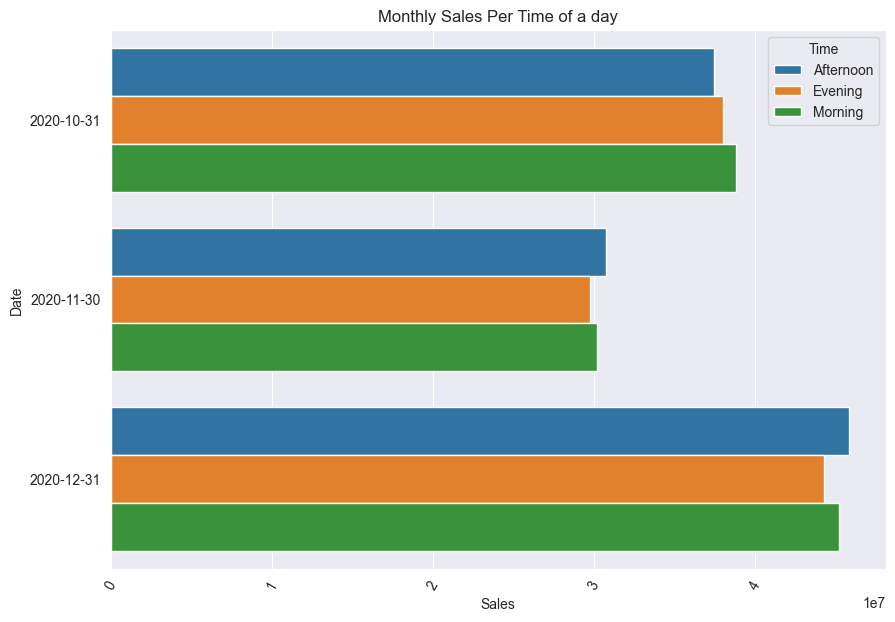

In [37]:
# As there are only 3 months, of data, bar grapth is used.
plt.figure(dpi =100, figsize = (10,7))
g = sns.barplot(data=monthly_time, x="Sales", y="Date", hue="Time")
g.set(title = "Monthly Sales Per Time of a day")
g.tick_params(axis = 'x', rotation = 60)

### Inference from the monthly reports
1. The best month is December, 2020. It shows the highest sales for all groups and across all states.
2. The least sales were seen in November, 2020 for all groups
3. For October and November sales were approximately the same across all groups.
4. In December, 2020, sales for Women and Man were slightly higher than sales for Senior and Kids.
5. Top state performer is VIC state. States NT, WA and TAS perform the least.
6. During month of October, 2020, customers prefered to buy items during morning time.
7. For months of November and December, 2020, the preferences changed to a differnt pattern. Most of sales were made during afternoon. The lease sales happened during evening time of a day.

# Quartely Analysis

In [38]:
# Group montly details
group_subset = reindexed_data[['Date','Group','Sales', 'Unit']]
quartely_group = group_subset.groupby('Group').resample('Q', on='Date')['Sales', 'Unit'].sum().reset_index()
quartely_group.head()

Group       Date     Sales   Unit
0     Kids 2020-12-31  85072500  34029
1      Men 2020-12-31  85750000  34300
2  Seniors 2020-12-31  84037500  33615
3    Women 2020-12-31  85442500  34177

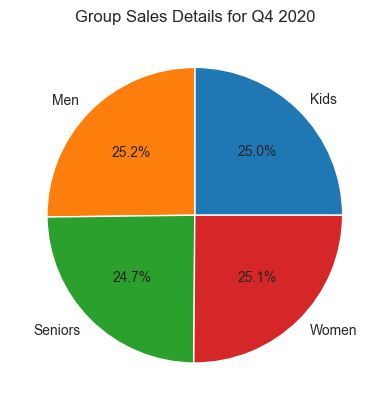

In [39]:
# As there is only one quarter, pie chart was used to represent data
plt.pie(quartely_group['Sales'], labels=quartely_group['Group'], autopct='%1.1f%%')
plt.title('Group Sales Details for Q4 2020')
plt.show()

In [40]:
# State quartely report
state_subset = reindexed_data[['Date','State','Sales', 'Unit']]
quartely_states = state_subset.groupby('State').resample('Q', on='Date')['Sales', 'Unit'].sum().reset_index()
quartely_states.head()

State       Date     Sales   Unit
0   NSW 2020-12-31  74970000  29988
1    NT 2020-12-31  22580000   9032
2   QLD 2020-12-31  33417500  13367
3    SA 2020-12-31  58857500  23543
4   TAS 2020-12-31  22760000   9104

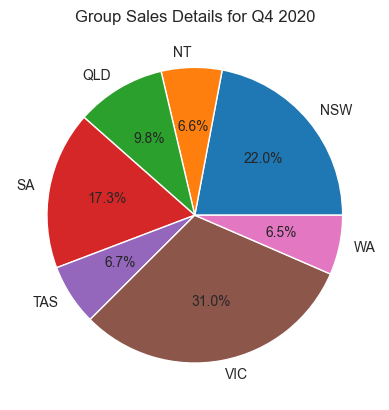

In [41]:
# As there is only one quarter, pie chart was used to represent data
plt.pie(quartely_states['Sales'], labels=quartely_states['State'], autopct='%1.1f%%')
plt.title('Group Sales Details for Q4 2020')
plt.show()

In [42]:
# Time quartely report
time_subset = reindexed_data[['Date','Time','State','Sales', 'Unit']]
quartely_time = time_subset.groupby('Time').resample('Q', on='Date')['Sales', 'Unit'].sum().reset_index()
quartely_time.head()

Time       Date      Sales   Unit
0  Afternoon 2020-12-31  114007500  45603
1    Evening 2020-12-31  112087500  44835
2    Morning 2020-12-31  114207500  45683

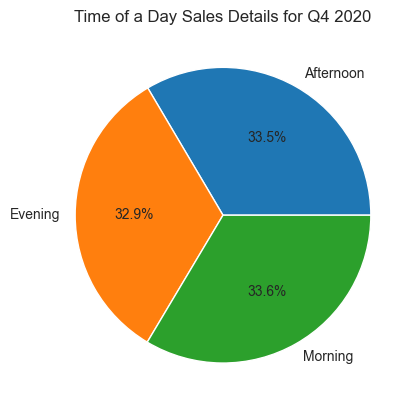

In [43]:
# As there is only one quarter, pie chart was used to represent data
plt.pie(quartely_time['Sales'], labels=quartely_time['Time'], autopct='%1.1f%%')
plt.title('Time of a Day Sales Details for Q4 2020')
plt.show()

In [44]:
# State group monthly report
state_group_subset = reindexed_data[['Date','State','Group','Sales','Unit']]
quartely_state_group = state_group_subset.groupby(['Group','State']).resample('Q', on='Date')['Sales', 'Unit'].sum().reset_index()
quartely_state_group.head()

Group State       Date     Sales  Unit
0  Kids   NSW 2020-12-31  18587500  7435
1  Kids    NT 2020-12-31   5700000  2280
2  Kids   QLD 2020-12-31   8510000  3404
3  Kids    SA 2020-12-31  14515000  5806
4  Kids   TAS 2020-12-31   5775000  2310

Text(0.5, 1.05, 'Quartely Sales Per State for Each Group')

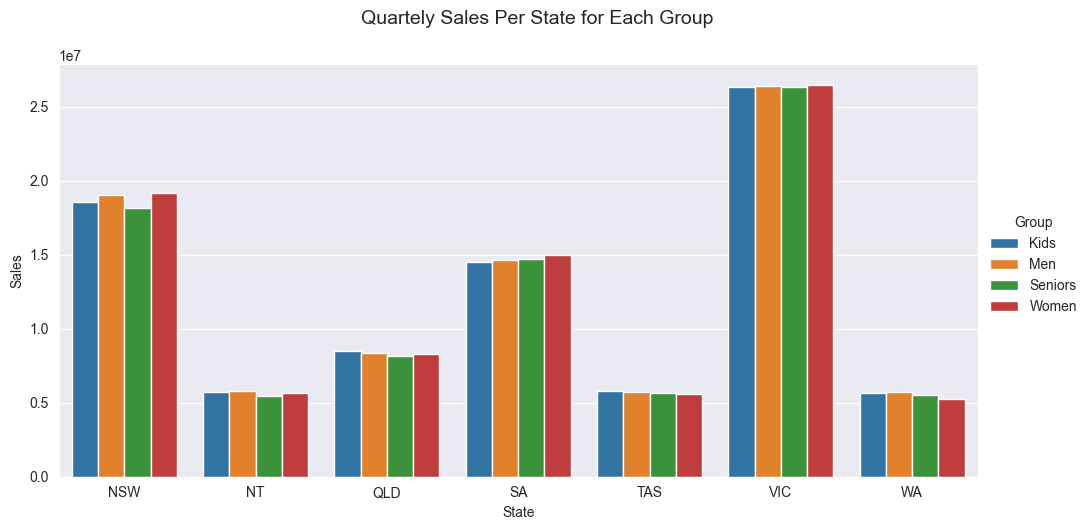

In [45]:
# Categorical Bar graph is used as two categories are compared
g=sns.catplot(
    quartely_state_group, kind="bar",
    x="State", y="Sales", 
    hue="Group",
    height=5, aspect=2,
)
g.fig.suptitle(t='Quartely Sales Per State for Each Group',y=1.05, fontsize=14)

Text(0.5, 1.05, 'Quartely Sales Per Group for Each State')

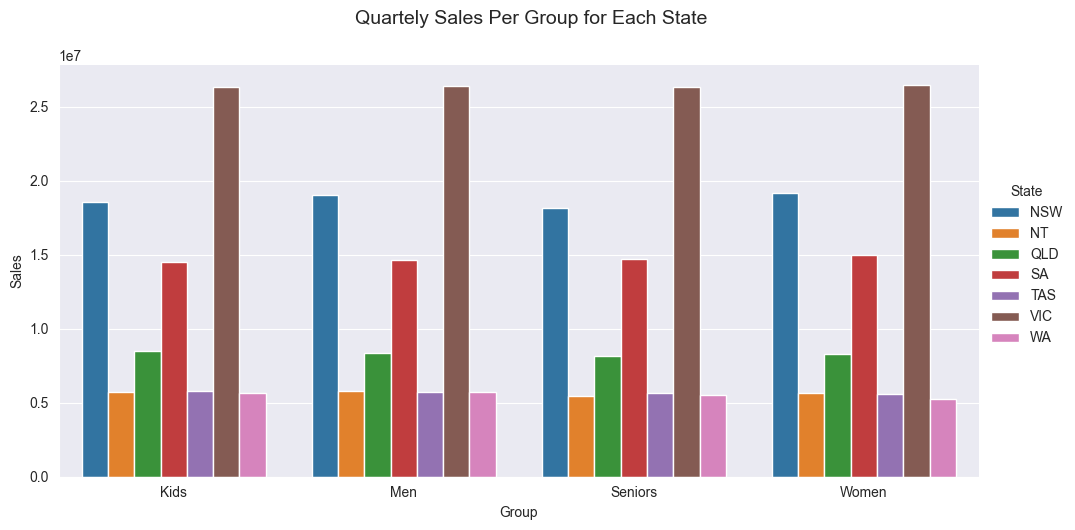

In [46]:
# Categorical Bar graph is used as two categories are compared
g=sns.catplot(
    quartely_state_group, kind="bar",
    x="Group", y="Sales", hue="State",
    height=5, aspect=2,
)
g.fig.suptitle(t='Quartely Sales Per Group for Each State', y=1.05, fontsize=14)
#g.tick_params(axis = 'x', rotation = 60)

In [47]:
# Time Group quartely report
time_group_subset = reindexed_data[['Date','Time','Group','State','Sales', 'Unit']]
quartely_time_group = time_group_subset.groupby(['Group','Time']).resample('Q', on='Date')['Sales', 'Unit'].sum().reset_index()
quartely_time_group.head()

Group       Time       Date     Sales   Unit
0  Kids  Afternoon 2020-12-31  28502500  11401
1  Kids    Evening 2020-12-31  28052500  11221
2  Kids    Morning 2020-12-31  28517500  11407
3   Men  Afternoon 2020-12-31  28767500  11507
4   Men    Evening 2020-12-31  28222500  11289

Text(0.5, 1.05, 'Quartely Sales Per Group for Different Time of a Day')

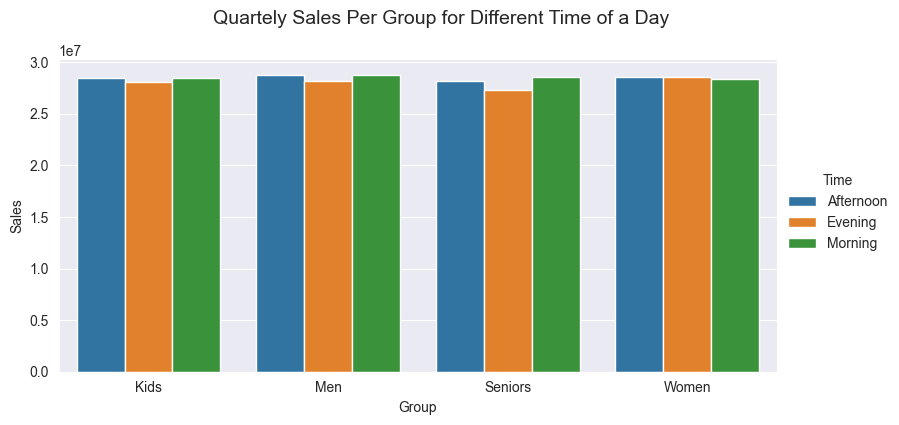

In [48]:
# Bar graph is used as two categories are compared
a = sns.catplot(
    quartely_time_group, kind="bar",
    x="Group", y="Sales",hue="Time",
    height=4, aspect=2,
)
#a.tick_params(axis = 'x', rotation = 60)
a.fig.suptitle(t='Quartely Sales Per Group for Different Time of a Day',y=1.05, fontsize=14)

Text(0.5, 1.05, 'Quartely State-Group Sales for Different Time of a Day')

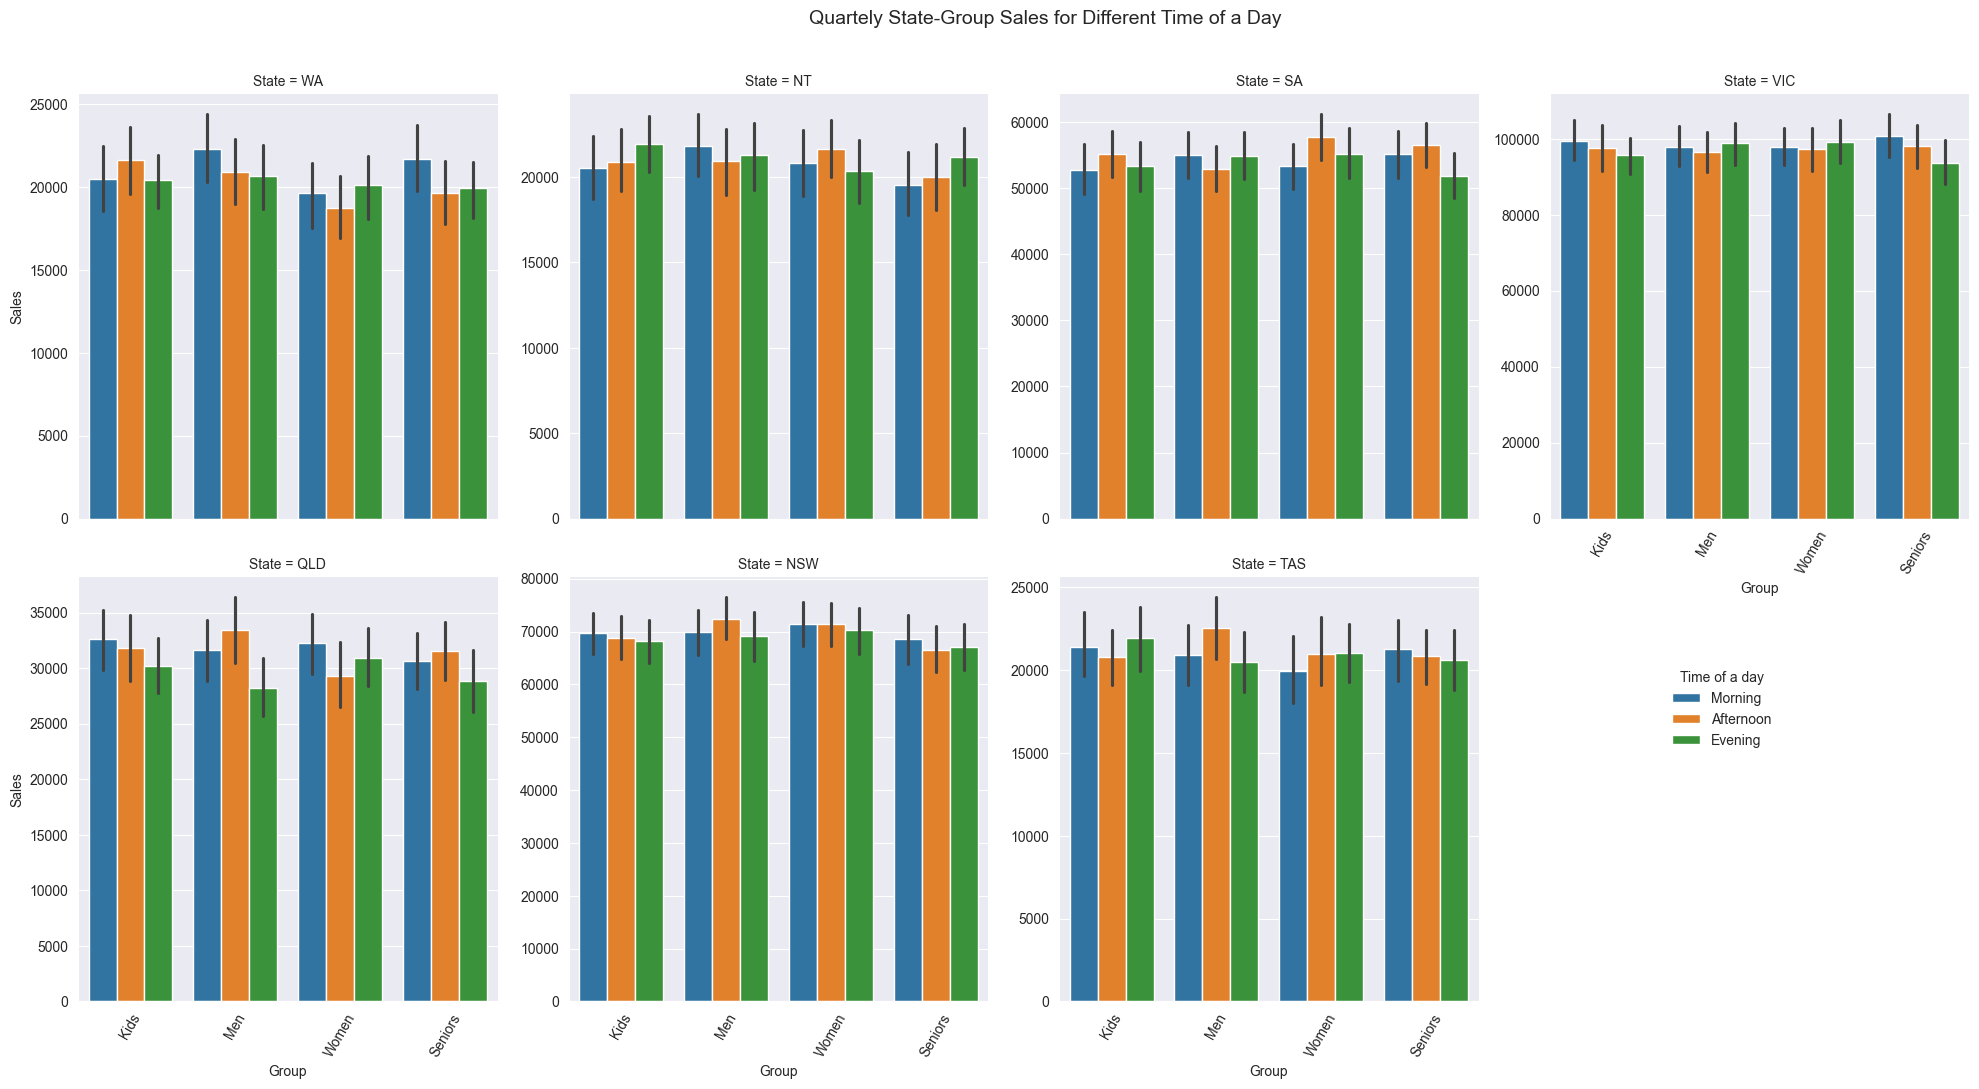

In [49]:
# Categorical Bar graph is used as two categories are compared
a = sns.catplot(
    df_sales, kind="bar",
    x="Group", y="Sales",hue="Time",col="State",
    col_wrap = 4,
    height=5, aspect=1,
    sharey=False,
)
sns.move_legend(a, 'lower right', 
                bbox_to_anchor=(.85, .3), 
                ncol=1, title = 'Time of a day')
a.tick_params(axis = 'x', rotation = 60)
a.fig.suptitle(t='Quartely State-Group Sales for Different Time of a Day', y=1.05, fontsize=14)

### Inference from the quartely reports
1. In total, all groups relevantly equally generated quarter sales. The tendency is the same per each state.
2. Similar pattern is observe for different time of a day. Overall, customers equally prefer to do shopping during morning/afternoon/evening.
3. Sales are not distributed equally across states. Top sales leader is VIC state. NSW and SA state show less sales accordingly. Least performing state are WA, NT, TAS.
4. On average, customers prefer to shop more for Senior category during morning or afternoon time.
5. States have different time of a day preferences for each group:
   - kids group states:
     - morning: QLD, VIC, NSW
     - afternoon: WA, SA
     - evening: NT,TAC
   - men group:
     - morning: WA, NT, SA
     - afternoon: SA, QLD, NSW, TAS
     - evening: VIC
   - women group:
     - morning: QLD, NSW
     - afternoon: NT, SA, NSW, TAS
     - evening: WA, VIC, TAS
   - senior group:
     - morning: WA, VIC, NSW, TAS
     - afternoon: SA, QLD, 
     - evening: NT

# Dashboard

## Weekly Dashboard

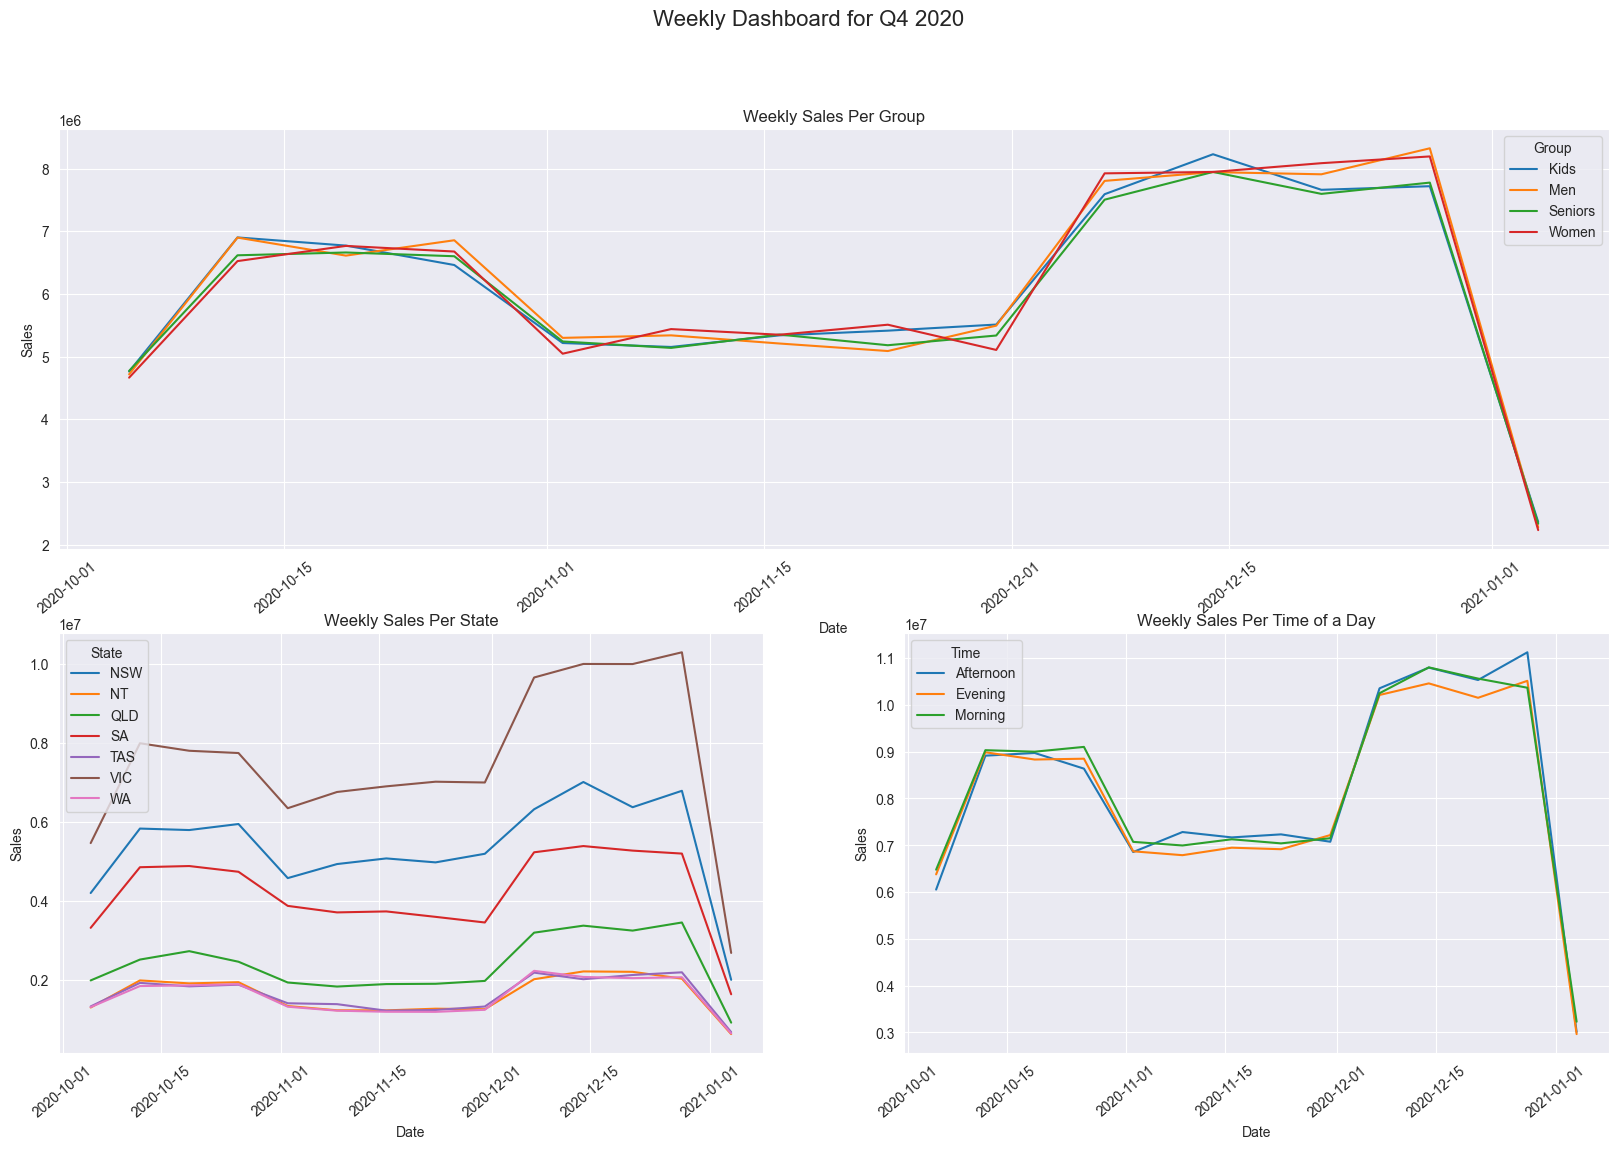

In [50]:
#plt.figure(figsize=(15, 30))
fig, axes = plt.subplot_mosaic(
    [["top row", "top row", ],
    ["bottom left",  "bottom right"]],
    figsize = (20,12)
)
fig.suptitle('Weekly Dashboard for Q4 2020', fontsize=16)

fig1= sns.lineplot(data=weekly_group, x="Date", y="Sales", hue="Group", ax= axes["top row"])
fig1.set(title = "Weekly Sales Per Group")
fig1.tick_params(axis = 'x', rotation = 40)
fig2 = sns.lineplot(data=weekly_states, x="Date", y="Sales", hue="State", ax= axes["bottom left"])
fig2.set(title = "Weekly Sales Per State")
fig2.tick_params(axis = 'x', rotation = 40)
#fig2.legend(loc = (0.3,0.63))
fig3 = sns.lineplot(data=weekly_time, x="Date", y="Sales", hue="Time",  ax= axes["bottom right"])
fig3.set(title = "Weekly Sales Per Time of a Day")
fig3.tick_params(axis = 'x', rotation = 40)

## Monthly Dashboard

[Text(0.5, 1.0, 'Monthly Sales Per Time of a day')]

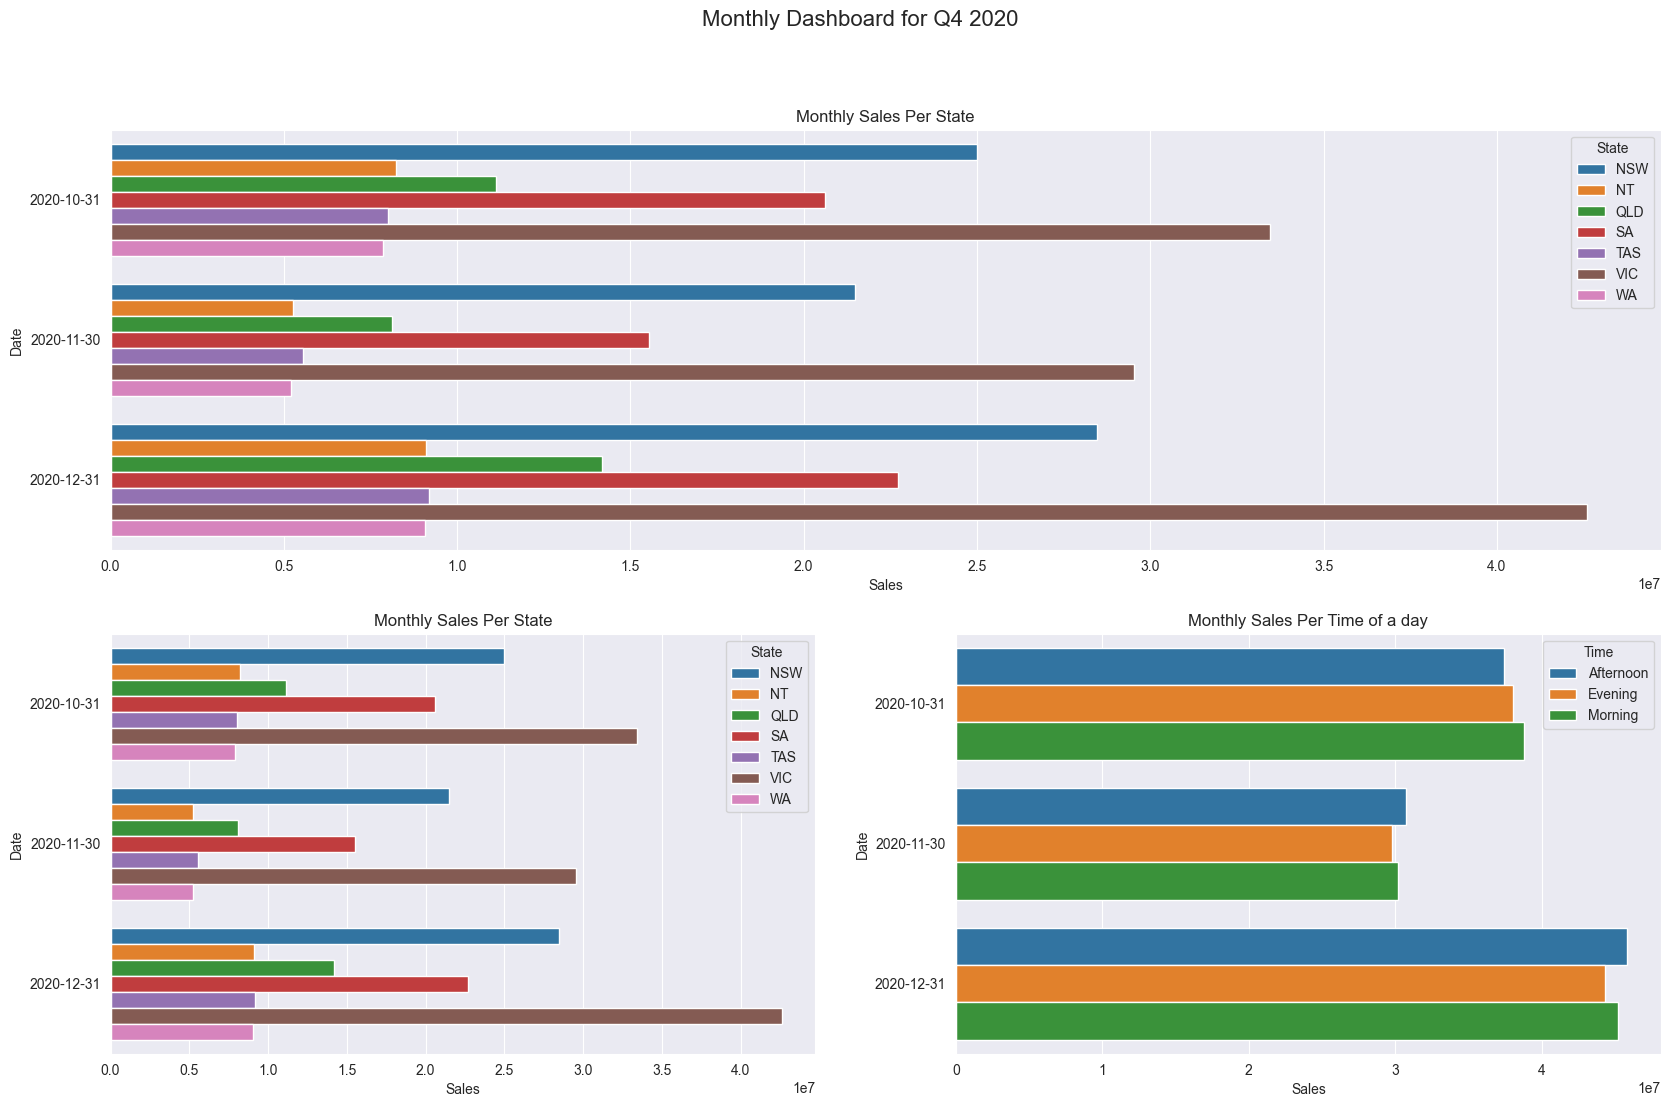

In [51]:
#plt.figure(figsize=(15, 30))
fig, axes = plt.subplot_mosaic(
    [["top row", "top row", ],
    ["bottom left",  "bottom right"]],
    figsize = (20,12)
)
fig.suptitle('Monthly Dashboard for Q4 2020', fontsize=16)
fig1 = sns.barplot(data=monthly_states, x="Sales", y="Date", hue="State", ax= axes["top row"])
fig1.set(title = "Monthly Sales Per State")
#fig1.tick_params(axis = 'x', rotation = 60)

fig2 = sns.barplot(data=monthly_states, x="Sales", y="Date", hue="State", ax= axes["bottom left"])
fig2.set(title = "Monthly Sales Per State")
#fig2.tick_params(axis = 'x', rotation = 60)

fig3 = sns.barplot(data=monthly_time, x="Sales", y="Date", hue="Time",  ax= axes["bottom right"])
fig3.set(title = "Monthly Sales Per Time of a day")
#fig3.tick_params(axis = 'x', rotation = 60)

## Quartely Dashboard

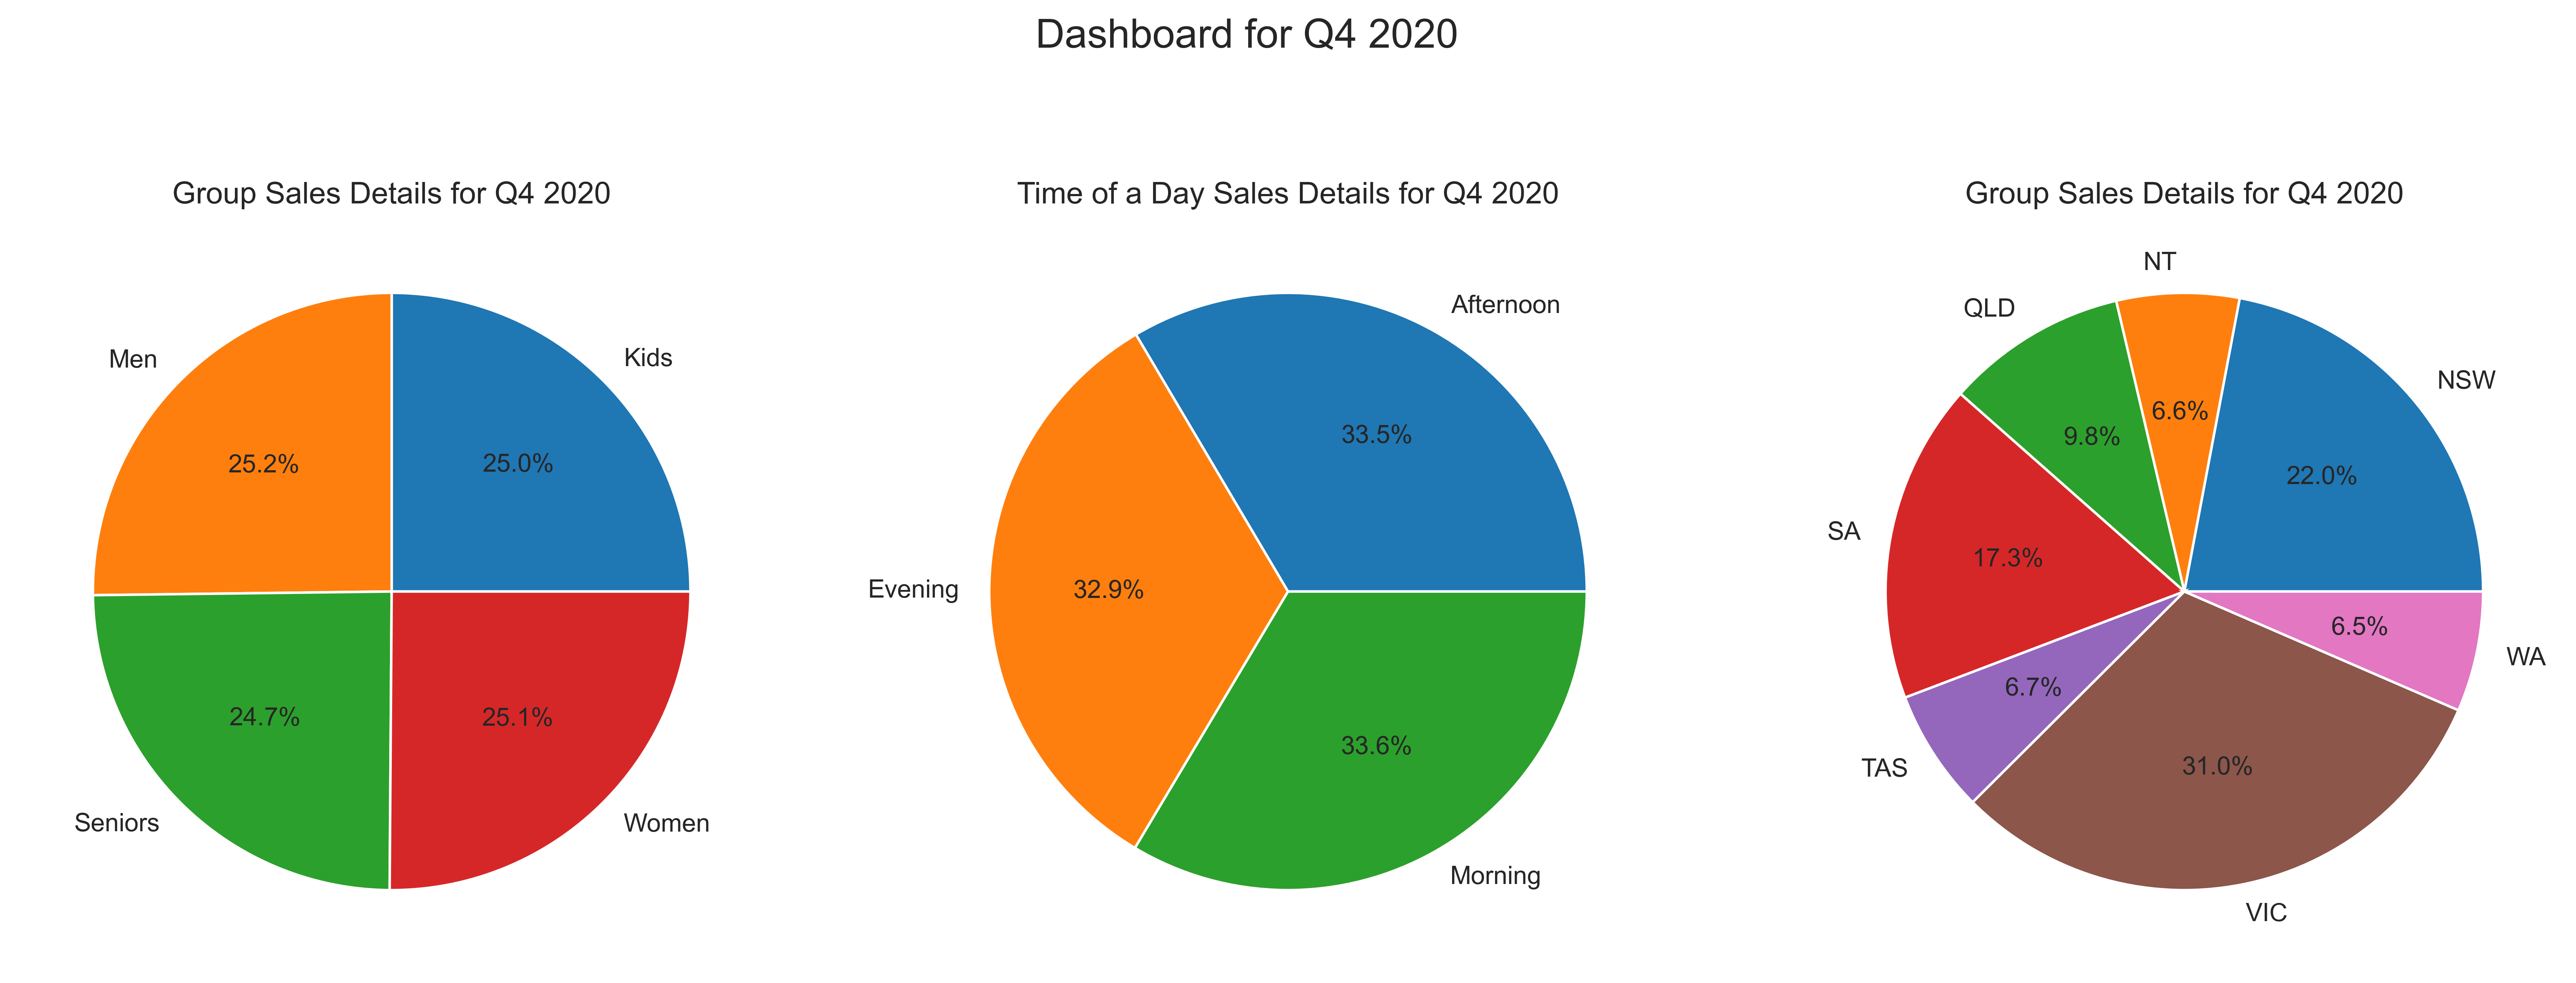

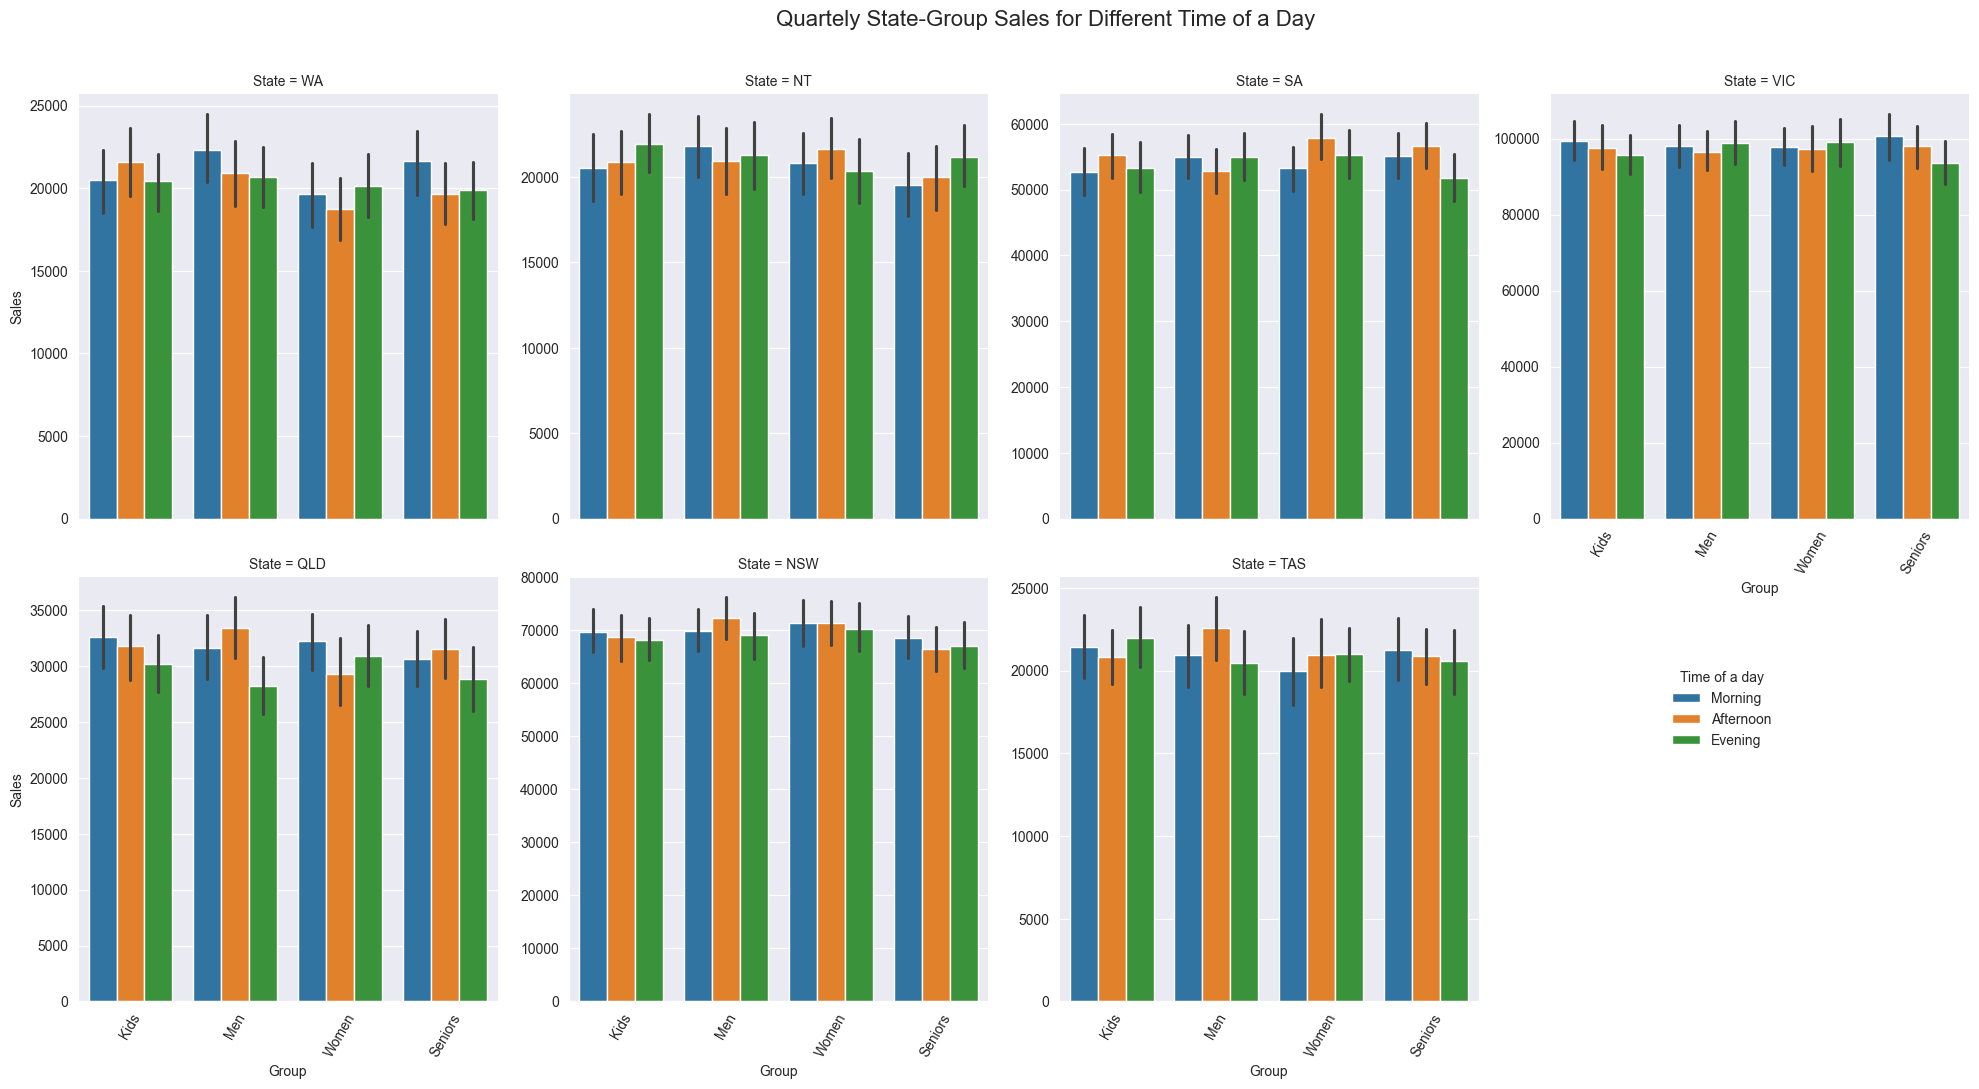

In [52]:
fig = plt.figure(figsize=(18,6.5), dpi=500)
#first row, first column
ax1 = plt.subplot2grid((1,3),(0,0))
plt.pie(quartely_group['Sales'], labels=quartely_group['Group'], autopct='%1.1f%%')
plt.title('Group Sales Details for Q4 2020')

#first row sec column
ax1 = plt.subplot2grid((1,3), (0, 1))
plt.pie(quartely_time['Sales'], labels=quartely_time['Time'], autopct='%1.1f%%')
plt.title('Time of a Day Sales Details for Q4 2020')

#first row third column
ax1 = plt.subplot2grid((1,3), (0, 2))
plt.pie(quartely_states['Sales'], labels=quartely_states['State'], autopct='%1.1f%%')
plt.title('Group Sales Details for Q4 2020')

fig.suptitle('Dashboard for Q4 2020', fontsize=16)

a = sns.catplot(
    df_sales, kind="bar",
    x="Group", y="Sales",hue="Time",col="State",
    col_wrap = 4,
    height=5, aspect=1,
    sharey=False,
)
sns.move_legend(a, 'lower right', 
                bbox_to_anchor=(.85, .3), 
                ncol=1, title = 'Time of a day')
a.fig.suptitle('Quartely State-Group Sales for Different Time of a Day', 
               y=1.05, fontsize=16
              )
a.tick_params(axis = 'x', rotation = 60)
